## Principle Component Analysis

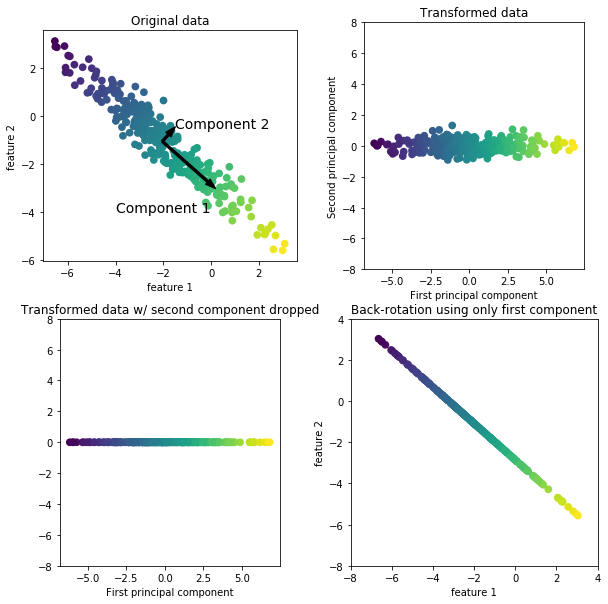

In [23]:
import mglearn
import matplotlib.pyplot as plt 
from sklearn.datasets import load_breast_cancer
import numpy as np
mglearn.plots.plot_pca_illustration()

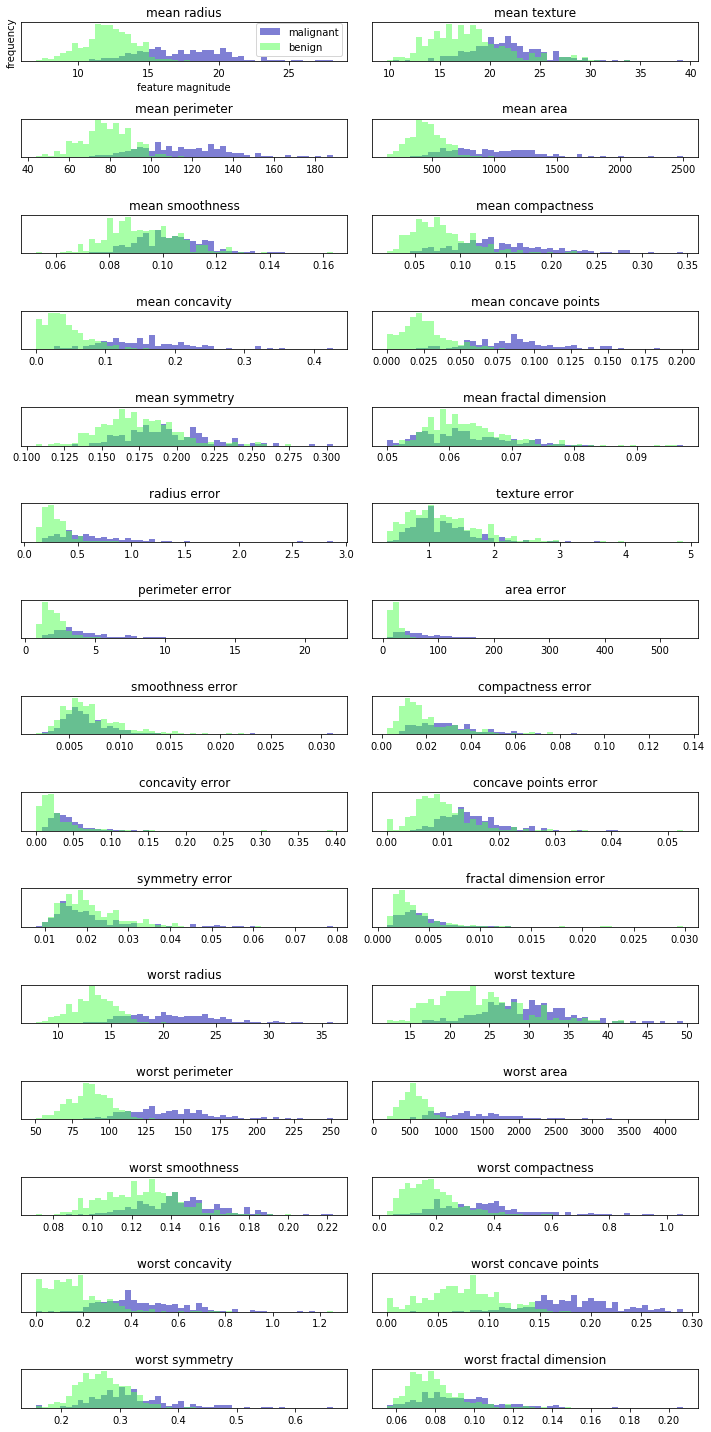

In [32]:
fig, axes = plt.subplots(15,2,figsize=(10,20))
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax=axes.ravel()
for i in range(30):
    _,bins = np.histogram(cancer.data[:,i],bins=50)
    ax[i].hist(malignant[:,i],bins=bins,color=mglearn.cm3(0),alpha=.5)
    ax[i].hist(benign[:,i],bins=bins,color=mglearn.cm3(2),alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('feature magnitude')
ax[0].set_ylabel('frequency')
ax[0].legend(['malignant','benign'])
fig.tight_layout()
    

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print('original shape {}'.format(X_scaled.shape))
print('pca shape {}'.format(X_pca.shape))

original shape (569, 30)
pca shape (569, 2)


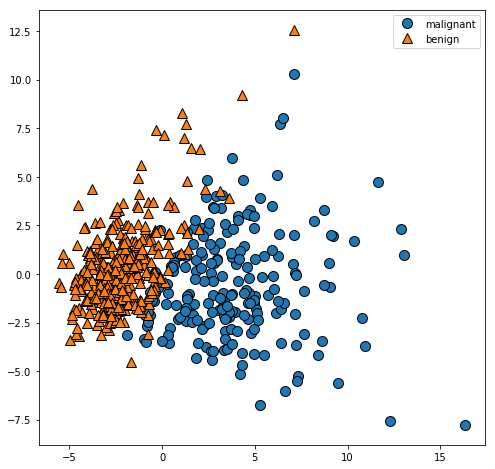

In [39]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0],X_pca[:,1],cancer.target)
plt.legend(cancer.target_names)

([<matplotlib.axis.XTick at 0x1c28877710>,
 <a list of 30 Text xticklabel objects>)

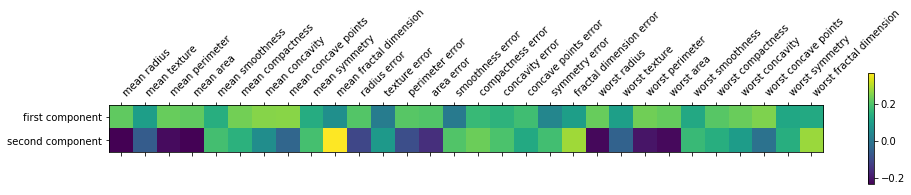

In [40]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1],['first component','second component'])
plt.colorbar()
plt.xticks(range(len(cacer.feature_names)),cancer.feature_names,
          rotation=45,ha='left')

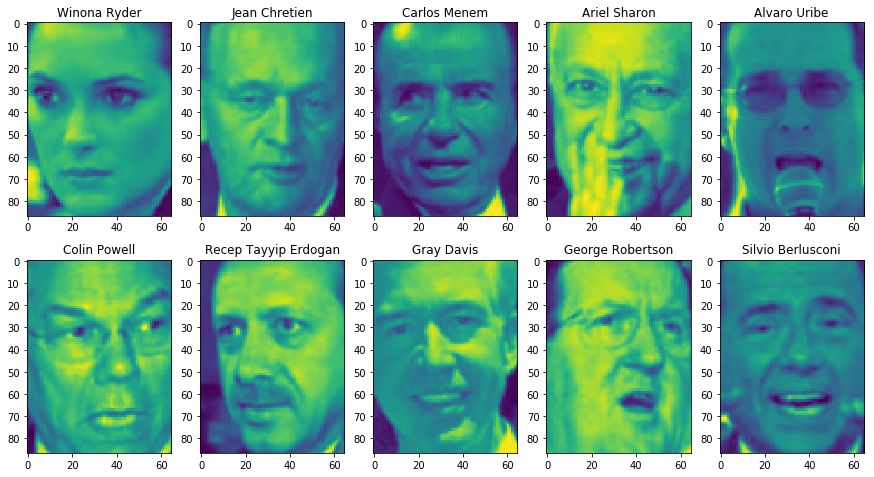

In [46]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
image_shape = people.images[0].shape
fig,axes= plt.subplots(2,5,figsize=(15,8))
for target,image,ax in zip(people.target,people.images,axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [77]:
mask=np.zeros(people.target.shape,dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1
X_people=people.data[mask]
y_people=people.target[mask]
X_people/=255

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_people,y_people)
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
print('test scored {}'.format(knn.score(X_test,y_test)))

test scored 0.23255813953488372


In [85]:
pca=PCA(n_components=100,whiten=True,random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [89]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print('test scored {}'.format(knn.score(X_test_pca,y_test)))

test scored 0.34108527131782945


In [92]:
print('total componet {}'.format(pca.components_.shape))

total componet (100, 5655)


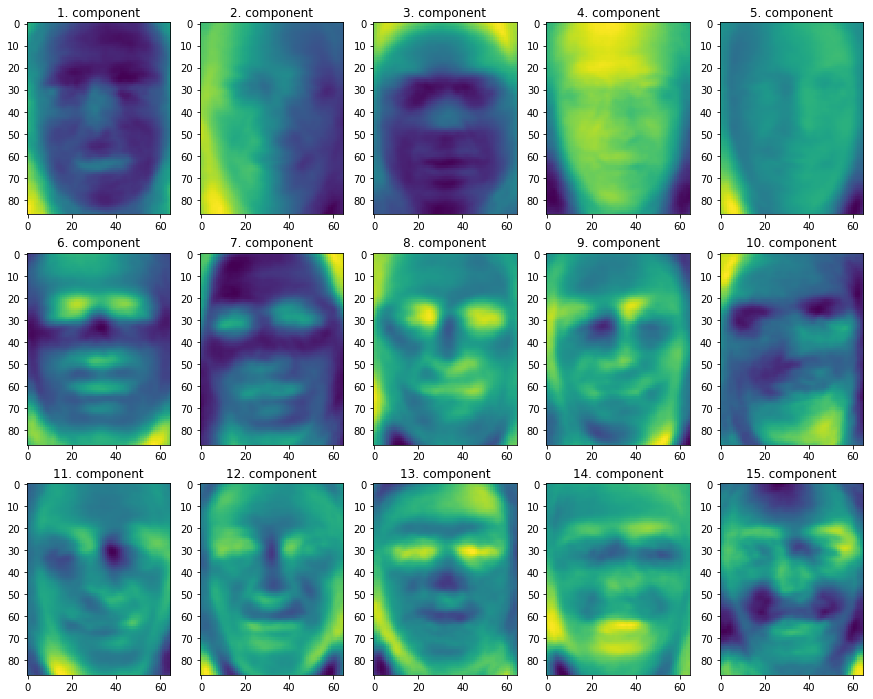

In [98]:
fig,axes=plt.subplots(3,5,figsize=(15,12))
for i,(component,ax) in enumerate(zip(pca.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')

    ax.set_title('{}. component'.format(i+1))

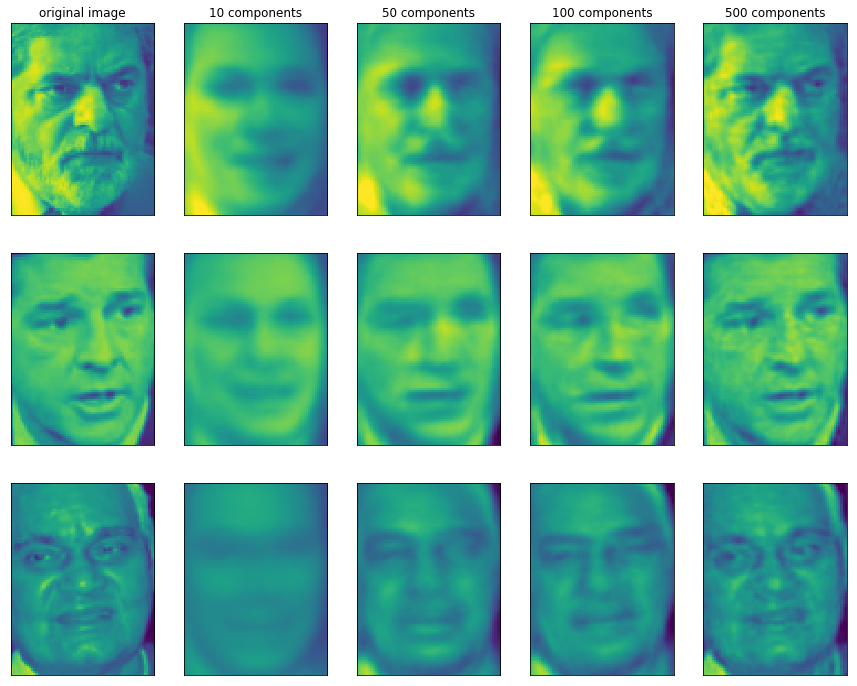

In [100]:
mglearn.plots.plot_pca_faces(X_train,X_test,image_shape)

Non-Negative Matrix Factorization (NMF)

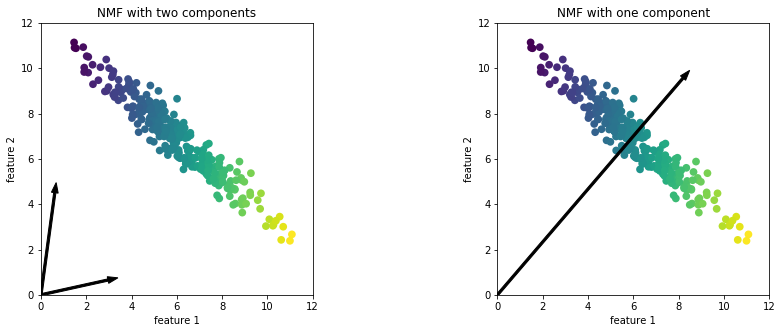

In [102]:
mglearn.plots.plot_nmf_illustration()

In [104]:
mglearn.plots.plot_nmf_faces(X_train,X_test,image_shape)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.133333, ..., 0.10719 ],
       ...,
       [0.082353, ..., 0.392157]], dtype=float32), 
array([[0.71634 , ..., 0.298039],
       ...,
       [0.137255, ..., 0.328105]], dtype=float32))


KeyboardInterrupt: 

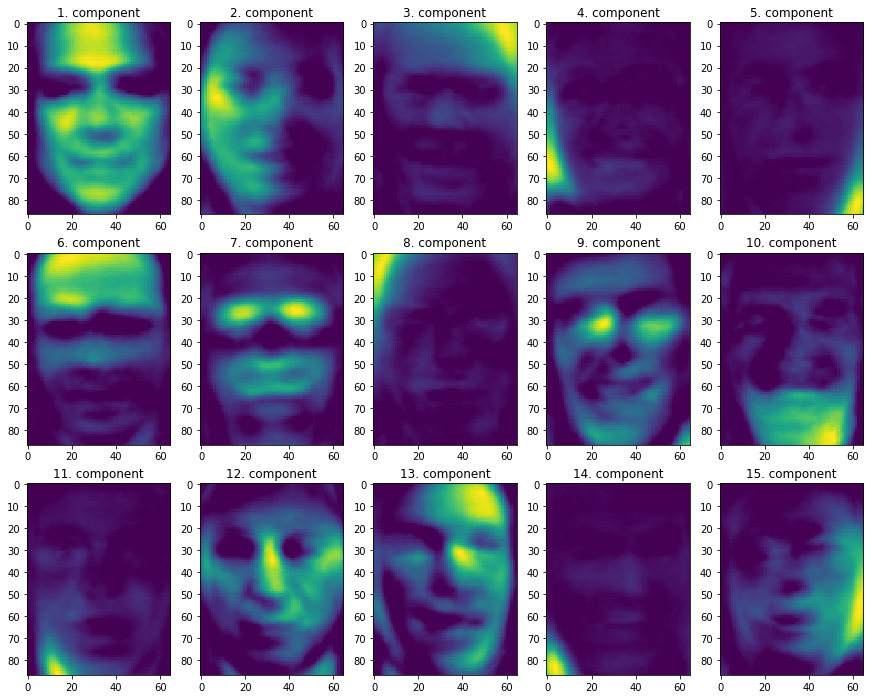

In [105]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=15,random_state=0)
nmf.fit(X_train,y_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)
fig,axes=plt.subplots(3,5,figsize=(15,12))
for i,(component,ax) in enumerate(zip(nmf.components_,axes.ravel())):
    ax.imshow(component.reshape(image_shape),cmap='viridis')

    ax.set_title('{}. component'.format(i+1))

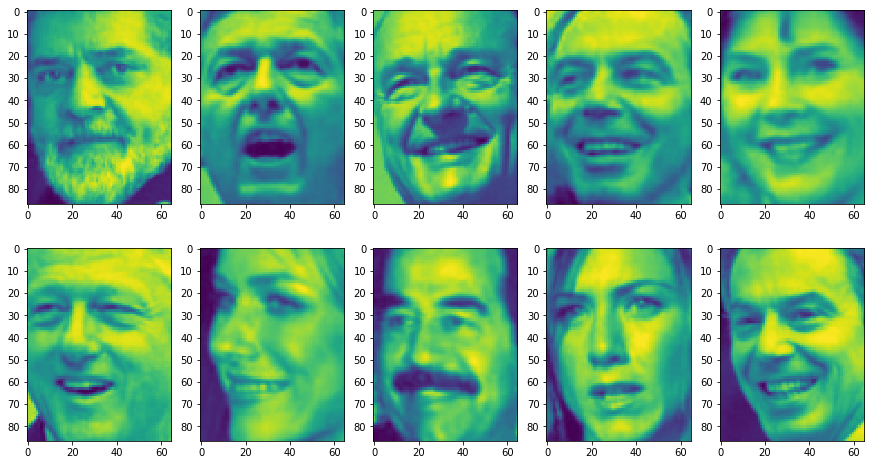

In [121]:
inds = np.argsort(X_train_nmf[:,8])[::-1]
fig,axes=plt.subplots(2,5,figsize=(15,8))
for i,(ind,ax) in enumerate(zip(inds,axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

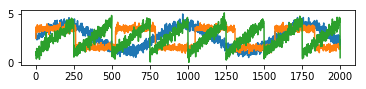

In [124]:
S=mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S,'-')

In [125]:
#mixing data into 100 dimentional state
A=np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S,A.T)

In [126]:
nmf=NMF(n_components=3,random_state=42)
S_=nmf.fit_transform(X)

In [127]:
pca=PCA(n_components=3)
H=nmf.fit_transform(X)

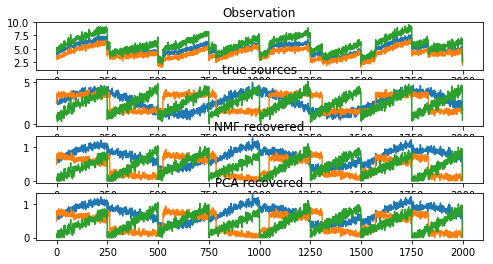

In [128]:
models=[X,S,S_,H]
names=['Observation','true sources','NMF recovered','PCA recovered']
fig,axes=plt.subplots(4,figsize=(8,4))
for model,name,ax in zip(models,names,axes):
    ax.set_title(name)
    ax.plot(model[:,:3])

Manifold Learning Algorithms (t-SNE)

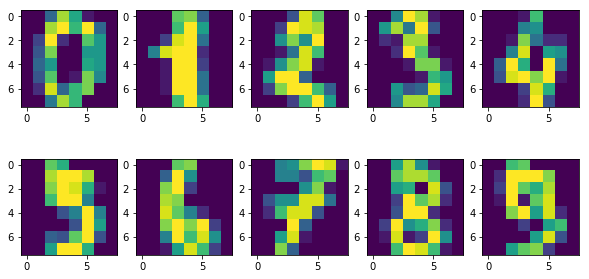

In [129]:
from sklearn.datasets import load_digits
digits=load_digits()

fig,axes=plt.subplots(2,5,figsize=(10,5))
for ax,img in zip(axes.ravel(),digits.images):
    ax.imshow(img)